# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов за контест и 20 баллов за ноутбук
* Задача 2 &mdash; 40 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 80 баллов

In [254]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import ipywidgets as widgets

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/python/07_random.html" target="_blank">обучающий ноутбук</a> по работе с вероятностными распределениями и генерации случайных чисел в Питоне. 

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.


**Части 1-3**

Условие задачи в контесте, ссылка на который отправлена через бот.
Далее можно использовать как свою реализацию функций, так и библиотечную.

Генерация распределений:
* `uniform` - Равномерное распределение,
* `normal` - Нормальное распределение,
* `expon` - Экспоненциальное распределение.

In [256]:
coin = sps.bernoulli(p=0.5).rvs


def uniform(size=1, precision=30):
    return coin(np.append(size, precision)) @ (2.0 ** np.arange(-precision, 0))


def normal(size=1, loc=0, scale=1, precision=30):
    u1 = uniform(size, precision)
    u2 = uniform(size, precision)
    z = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    return z * scale + loc


def expon(size=1, lambd=1, precision=30):
    u = uniform(size, precision)
    return -np.log(1 - u) / lambd

**Часть 4**


Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам. Для построения графика необходимо брать достаточно большое количество точек сетки.

Эта функция используется для визуализации распределения случайной величины. Она отображает гистограмму выборки, плотность выборки (полученную с использованием ядерной оценки плотности), а также график плотности вероятности исходного распределения.

Эта функция удобна для визуализации и анализа распределений случайных величин.

In [257]:
def draw_distribution(
    sample,
    x_left_bord,
    x_right_bord,
    distribution_pdf=sps.uniform.pdf,
    distribution_name=r"${U}(0, 1)$",
    figsize=(10, 7),
    bin=20,
    plot_hist=True,
    plot_sample_density=True,
    plot_distribution_density=True,
    plot_values_on_the_line=False,
):
    """
    Визуализирует распределение случайной величины.

    Параметры:
        sample (array): Выборка случайной величины.
        x_left_bord (float): Левая граница для оси x.
        x_right_bord (float): Правая граница для оси x.
        distribution_pdf (function): Функция плотности вероятности распределения. По умолчанию используется плотность равномерного распределения.
        distribution_name (str): Название распределения. По умолчанию равномерное распределение.
        figsize (tuple): Размер графика (ширина, высота). По умолчанию (10, 7).
        bin (int): Количество корзин в гистограмме. По умолчанию 20.
        plot_hist (bool): Отображать гистограмму выборки. По умолчанию True.
        plot_sample_density (bool): Отображать плотность выборки (ядро KDE). По умолчанию True.
        plot_distribution_density (bool): Отображать график плотности вероятности распределения. По умолчанию True.
        plot_values_on_the_line (bool): Отображать значения выборки на графике. По умолчанию False.
    """

    # Сетка для построения графика
    grid = np.linspace(x_left_bord, x_right_bord, 100000)

    plt.figure(figsize=figsize)

    if plot_hist:
        # Гистограмма
        plt.hist(
            sample,
            bins=bin,  # Используем переданный параметр для определения количества корзин
            density=True,
            alpha=0.4,
            color="blue",
            label="Случайная величина",
        )

    if plot_sample_density:
        # Плотность выборки в виде ядерной оценки плотности
        sns.kdeplot(
            sample, color="orange", linestyle="-.", label="Плотность выборки (KDE)"
        )

    if plot_distribution_density:
        # График плотности равномерного распределения
        plt.plot(
            grid,
            distribution_pdf(grid),
            color="red",
            lw=0.5,
            label="Плотность " + distribution_name,
        )

    if plot_values_on_the_line:
        # Значения выборки представлены в виде точек на оси
        plt.scatter(sample, np.zeros(sample.size), alpha=0.4)

    # Подписи на осях
    plt.xlabel("Значение")
    plt.ylabel("Плотность")

    # Подпись графика
    plt.title(r"Случайная величина $\xi \sim$" + distribution_name, fontsize=14)

    if plot_distribution_density or plot_hist or plot_sample_density:
        # Легенда
        plt.legend(fontsize=14, loc="best")

    # Расширение осей
    plt.xlim(x_left_bord, x_right_bord)

    # Включение сетки
    plt.grid(True)

    plt.show()

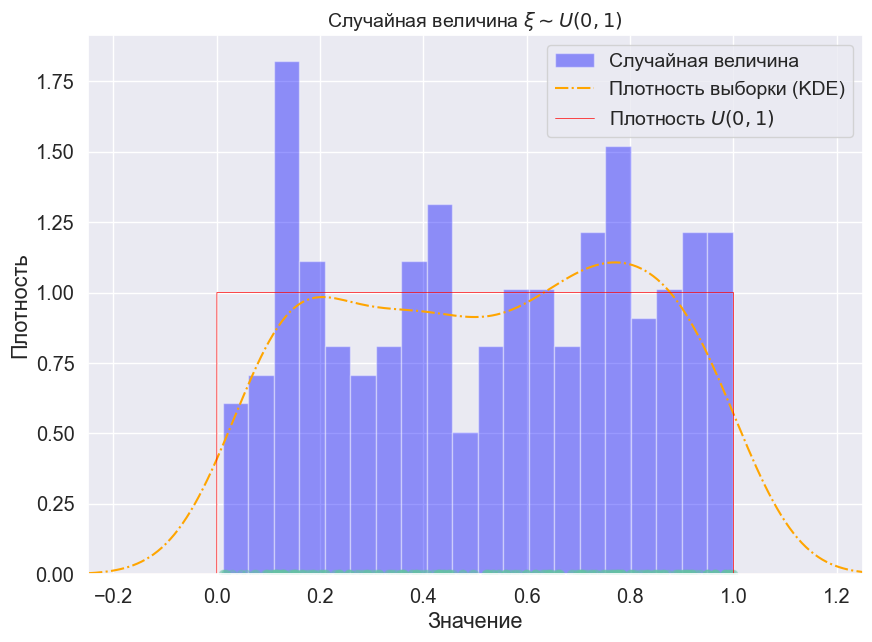

In [258]:
# параметры эксперимента
selection_size = 200
x_left_bord, x_right_bord = -0.25, 1.25
precision = 30

# Выборка
sample = uniform(size=selection_size, precision=precision)

with sns.axes_style("darkgrid"):
    draw_distribution(sample, x_left_bord, x_right_bord, plot_values_on_the_line=True)

Рассмотрим среднее значение выборки. Математическое ожидание для равномерного распределения равно 0.5.

In [259]:
print(f"Среднее значение выборки: %.3f" % np.mean(sample))
print(f"Математическое ожидание равномерного распределения: 0.5")

Среднее значение выборки: 0.525
Математическое ожидание равномерного распределения: 0.5


Исследуйте, как меняются значения случайных величин в зависимости от `precision` в написанной ранее вами функции.

`Precision` в данном контексте означает точность, то есть, какие значения на отрезке вообще может принимать случайная величина. Поэтому, кажется, будет наиболее наглядным показать одномерный график значений выборки

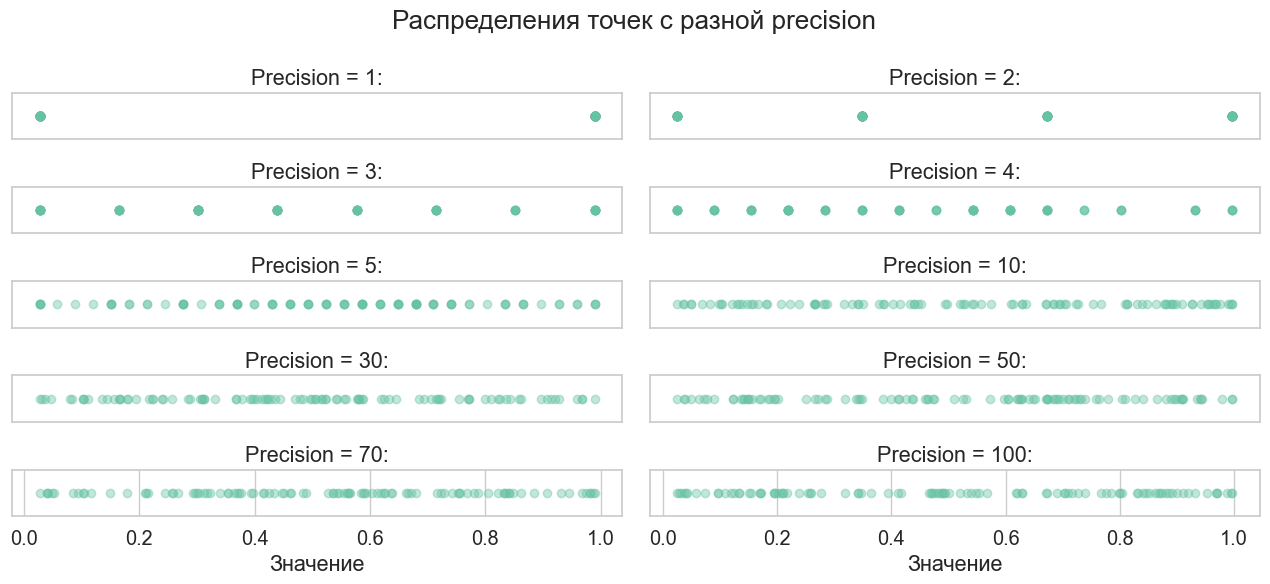

In [260]:
precision_values = [1, 2, 3, 4, 5, 10, 30, 50, 70, 100]

# Создание главного графика
plt.figure(figsize=(13, 6))

# Название главного графика
plt.suptitle("Распределения точек с разной precision")

for i, precision in enumerate(precision_values):
    ax = plt.subplot(5, 2, i + 1)

    ax.set_title(f"Precision = {precision}:")

    # Генерация выборки и отрисовка распределения на подграфике
    sample = uniform(size=100, precision=precision)
    plt.scatter(sample, np.zeros(sample.size), alpha=0.4)

    ax.set_yticks([])

    if i <= 7:
        ax.set_xticks([])
    else:
        plt.xlabel("Значение")

# Автоматическое корректное размещение графиков
plt.tight_layout()
plt.show()

Ещё исследование средних значений выборки при различных значениях `precision` может быть полезным для понимания того, как изменяется распределение среднего с увеличением точности.

In [261]:
# параметры эксперимента
selection_size = 10000
precision_values = np.arange(1, 25)

# Создание пустого массива для средних значений
means_array = []

# Преобразование списков в массивы numpy
precision_values = np.array(precision_values)
means_array = np.array(means_array)

for precision in precision_values:
    # Генерация выборки
    sample = uniform(size=selection_size, precision=precision)

    # Вычисление среднего значения выборки и добавление в массив
    mean = sample.mean()
    means_array = np.append(means_array, mean)

Построение графика зависимости среднего значения от точности.

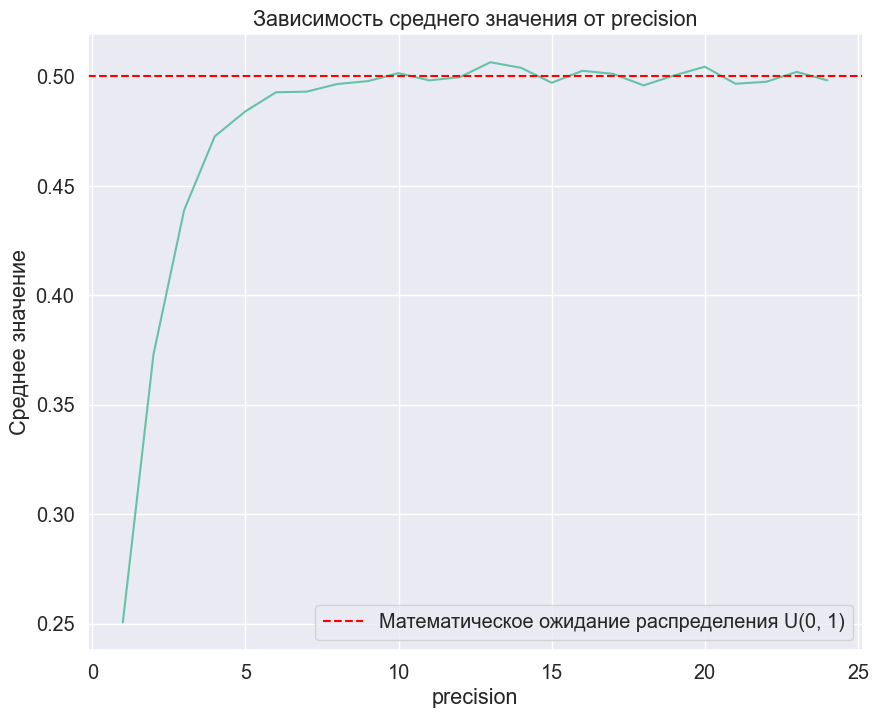

In [262]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=[10, 8])

    plt.plot(precision_values, means_array)

    plt.axhline(
        y=0.5,
        color="r",
        linestyle="--",
        label=r"Математическое ожидание распределения U(0, 1)",
    )

    plt.xlabel("precision")
    plt.ylabel("Среднее значение")
    plt.title("Зависимость среднего значения от precision")
    plt.grid(True)
    plt.legend()
    plt.show()

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

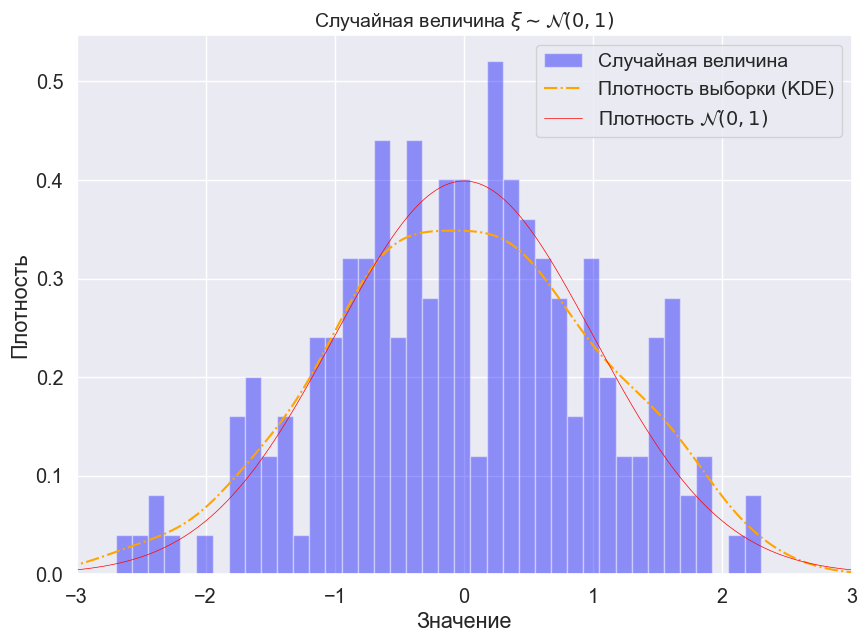

In [263]:
# параметры эксперимента
selection_size = 200
x_left_bord, x_right_bord = -3, 3
precision = 3000
loc = 0
scale = 1

# Выборка
sample = normal(loc=loc, scale=scale, size=selection_size, precision=precision)

with sns.axes_style("darkgrid"):
    draw_distribution(
        sample,
        x_left_bord,
        x_right_bord,
        bin=40,
        distribution_pdf=sps.norm.pdf,
        distribution_name=r"$\mathcal{N}(0, 1)$",
    )

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

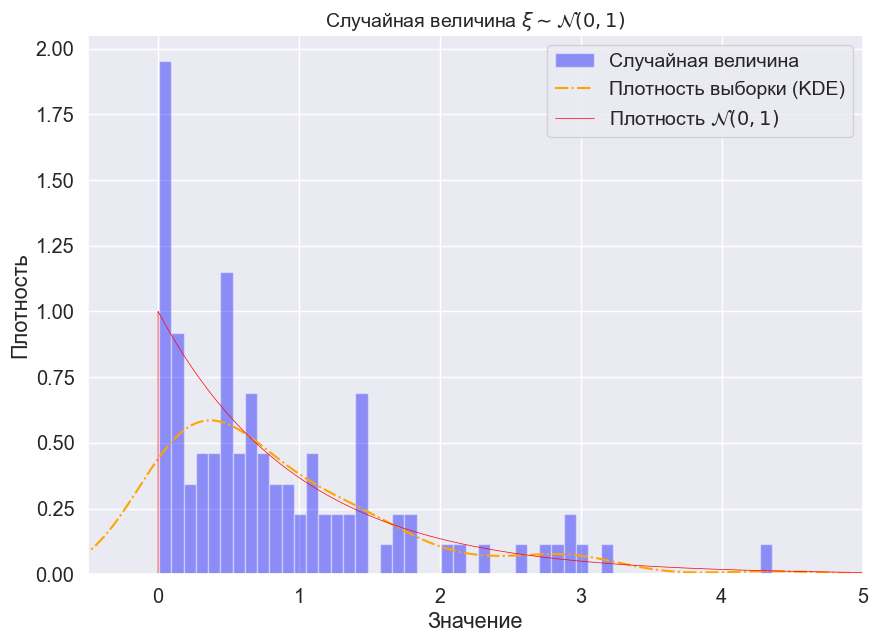

In [264]:
# параметры эксперимента
selection_size = 100
x_left_bord, x_right_bord = -0.5, 5
precision = 3000
lambd = 1

# Выборка
sample = expon(lambd=lambd, size=selection_size, precision=precision)

with sns.axes_style("darkgrid"):
    draw_distribution(
        sample,
        x_left_bord,
        x_right_bord,
        bin=50,
        distribution_pdf=sps.expon.pdf,
        distribution_name=r"$\mathcal{N}(0, 1)$",
    )

**Выводы:**

#TODO

---

### Задача 2.

Рассмотрим <a target="_black" href="https://ru.wikipedia.org/wiki/Распределение_Коши">распределение Коши</a> с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими <a target="_black" href="https://en.wikipedia.org/wiki/Heavy-tailed_distribution">тяжелыми хвостами</a>. Иначе говоря, плотность убывает медленно при $x \to \infty$ (точное определение может различаться для разных источников). Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

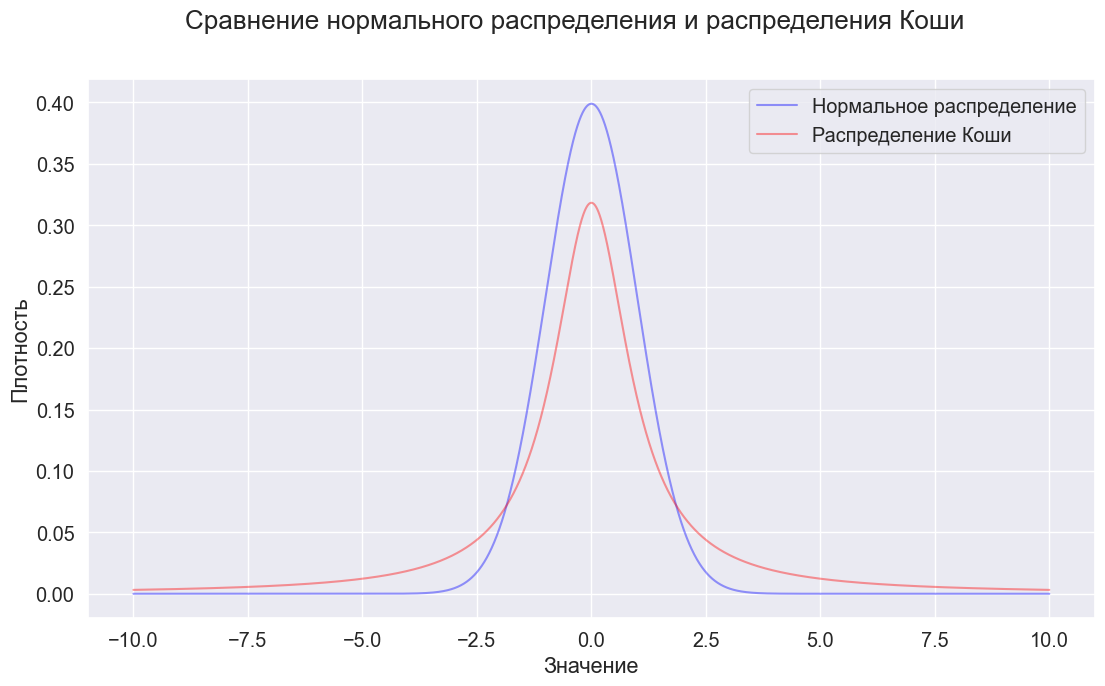

In [265]:
left_bord = -10
right_bord = 10

# Создаем график
with sns.axes_style("darkgrid"):
    plt.figure(figsize=[13, 7])

    # Создаем сетку значений для оси x
    grid = np.linspace(left_bord, right_bord, 10000)

    # Визуализируем плотность нормального распределения
    plt.plot(
        grid,
        sps.norm.pdf(grid),
        alpha=0.4,
        label="Нормальное распределение",
        color="blue",
    )

    # Визуализируем плотность распределения Коши
    plt.plot(
        grid,
        sps.cauchy.pdf(grid),
        label="Распределение Коши",
        alpha=0.4,
        color="red",
    )

    plt.xlabel("Значение")
    plt.ylabel("Плотность")
    plt.legend()

    plt.suptitle("Сравнение нормального распределения и распределения Коши")

    plt.show()

Сравнивая плотности нормального распределения и распределения Коши на графике, можно заметить, что плотность распределения Коши имеет более тяжелые хвосты по сравнению с нормальным распределением. Это указывает на то, что вероятность возникновения экстремальных значений значительно выше в распределении Коши.

Кроме того, стоит отметить, что распределение Коши не имеет математического ожидания из-за своих тяжелых хвостов. Таким образом, распределение Коши отличается от нормального распределения не только своей формой, но и своими статистическими характеристиками, что следует учитывать при его анализе и интерпретации.

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

Эта функция визуализирует проверку закона больших чисел для заданного распределения случайной величины. Она генерирует выборку из указанного распределения, вычисляет кумулятивные средние и строит график этих средних, а также отображает ожидаемое значение в виде горизонтальной линии. Параметры функции позволяют настроить размер графика, управлять его отображением и указать границы по оси.

In [266]:
def visual_verification_LLN(
    size=1000,
    distribution=sps.uniform(),
    distribution_name=r"${U}(0, 1)$",
    expected=sps.uniform().mean(),
    figsize=(11, 7),
    manage_creation_plot=True,
    y_lower_bound=0,
    y_upper_bound=0,
    alpha=0.5,
):
    """
    Визуализирует проверку закона больших чисел для заданного распределения случайной величины.

    Параметры:
        size (int): Размер выборки.
        distribution (scipy.stats distribution): Распределение случайной величины. По умолчанию используется равномерное распределение.
        distribution_name (str): Название распределения. По умолчанию "${U}(0, 1)$".
        expected (float): Ожидаемое значение среднего. По умолчанию равно среднему значению распределения.
        figsize (tuple): Размер графика (ширина, высота). По умолчанию (10, 7).
        manage_creation_plot (bool): Флаг управления созданием графика. Если True, график будет отображен, иначе - только подготовлен. По умолчанию True.
        y_lower_bound (float): Нижняя граница по оси y. Если не указана, используется значение expected - стандартное отклонение распределения / 2. По умолчанию 0.
        y_upper_bound (float): Верхняя граница по оси y. Если не указана, используется значение expected + стандартное отклонение распределения / 2. По умолчанию 0.
        alpha (float): Прозрачность линии графика. По умолчанию 0.5.

    Возвращает:
        None
    """

    if manage_creation_plot:
        # Создание нового графика с указанным размером
        plt.figure(figsize=figsize)

        plt.title(
            "Проверка закона больших чисел для распределения " + distribution_name,
            fontsize=14,
        )

    # Определение подписи для ожидаемого значения
    label = "Ожидаемое значение"
    if distribution.mean() == expected:
        label = "Математическое ожидание распределения " + distribution_name

    # Генерация выборки
    samples = distribution.rvs(size=size)

    # Вычисление кумулятивных средних
    cum_means = samples.cumsum() / (np.arange(size) + 1)

    # Построение графика кумулятивных средних
    plt.plot(
        cum_means,
        lw=alpha * 1.7,
        label="Среднее значение распределения " + distribution_name,
    )

    # Отображение ожидаемого значения в виде горизонтальной линии
    plt.hlines(
        expected,
        0,
        size,
        alpha=alpha,
        color="Red",
        linestyle="--",
        label=label,
    )

    # Установка пределов по осям y
    if y_lower_bound == 0 or y_upper_bound == 0:
        # Если не указаны границы по оси y, используются стандартное отклонение распределения / 2
        plt.ylim((expected - distribution.std() / 2, expected + distribution.std() / 2))
    else:
        plt.ylim((y_lower_bound, y_upper_bound))

    plt.xlim((-5, size))

    # Подписи на осях
    plt.xlabel("Количество случайных величин", fontsize=14)
    plt.ylabel("Среднее значение", fontsize=14)
    
    plt.legend(loc="upper right")

    # Отображение графика, если флаг plot_manage_creation равен True
    if manage_creation_plot:
        plt.show()

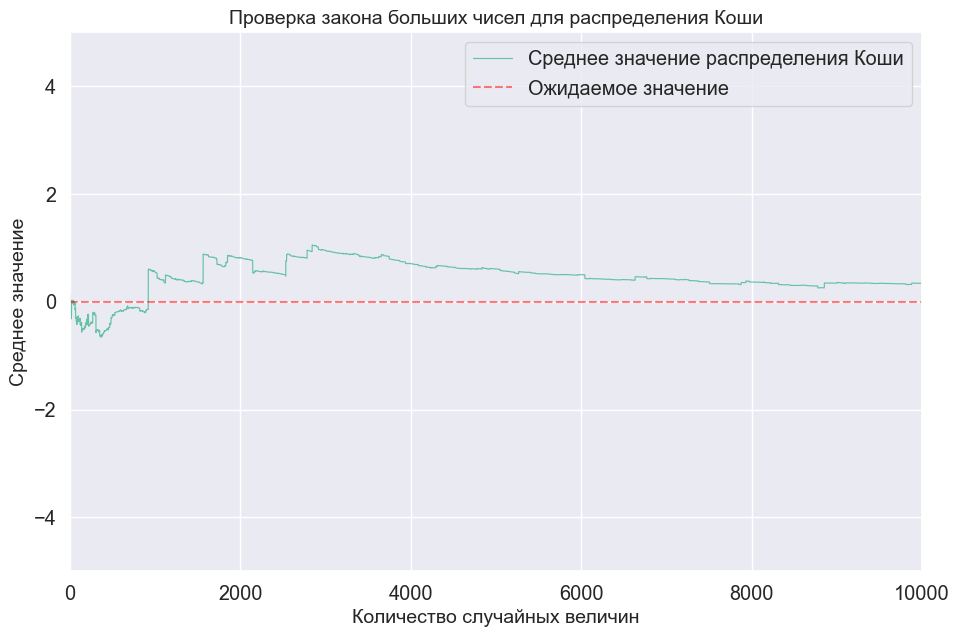

In [267]:
with sns.axes_style("darkgrid"):
    visual_verification_LLN(
        size=10000,
        distribution=sps.cauchy(loc=0, scale=0.5),
        expected=0,
        distribution_name="Коши",
        y_lower_bound=-5,
        y_upper_bound=5,
        alpha=0.5,
    )

Повторим эксперимент 10 раз **независимо**.

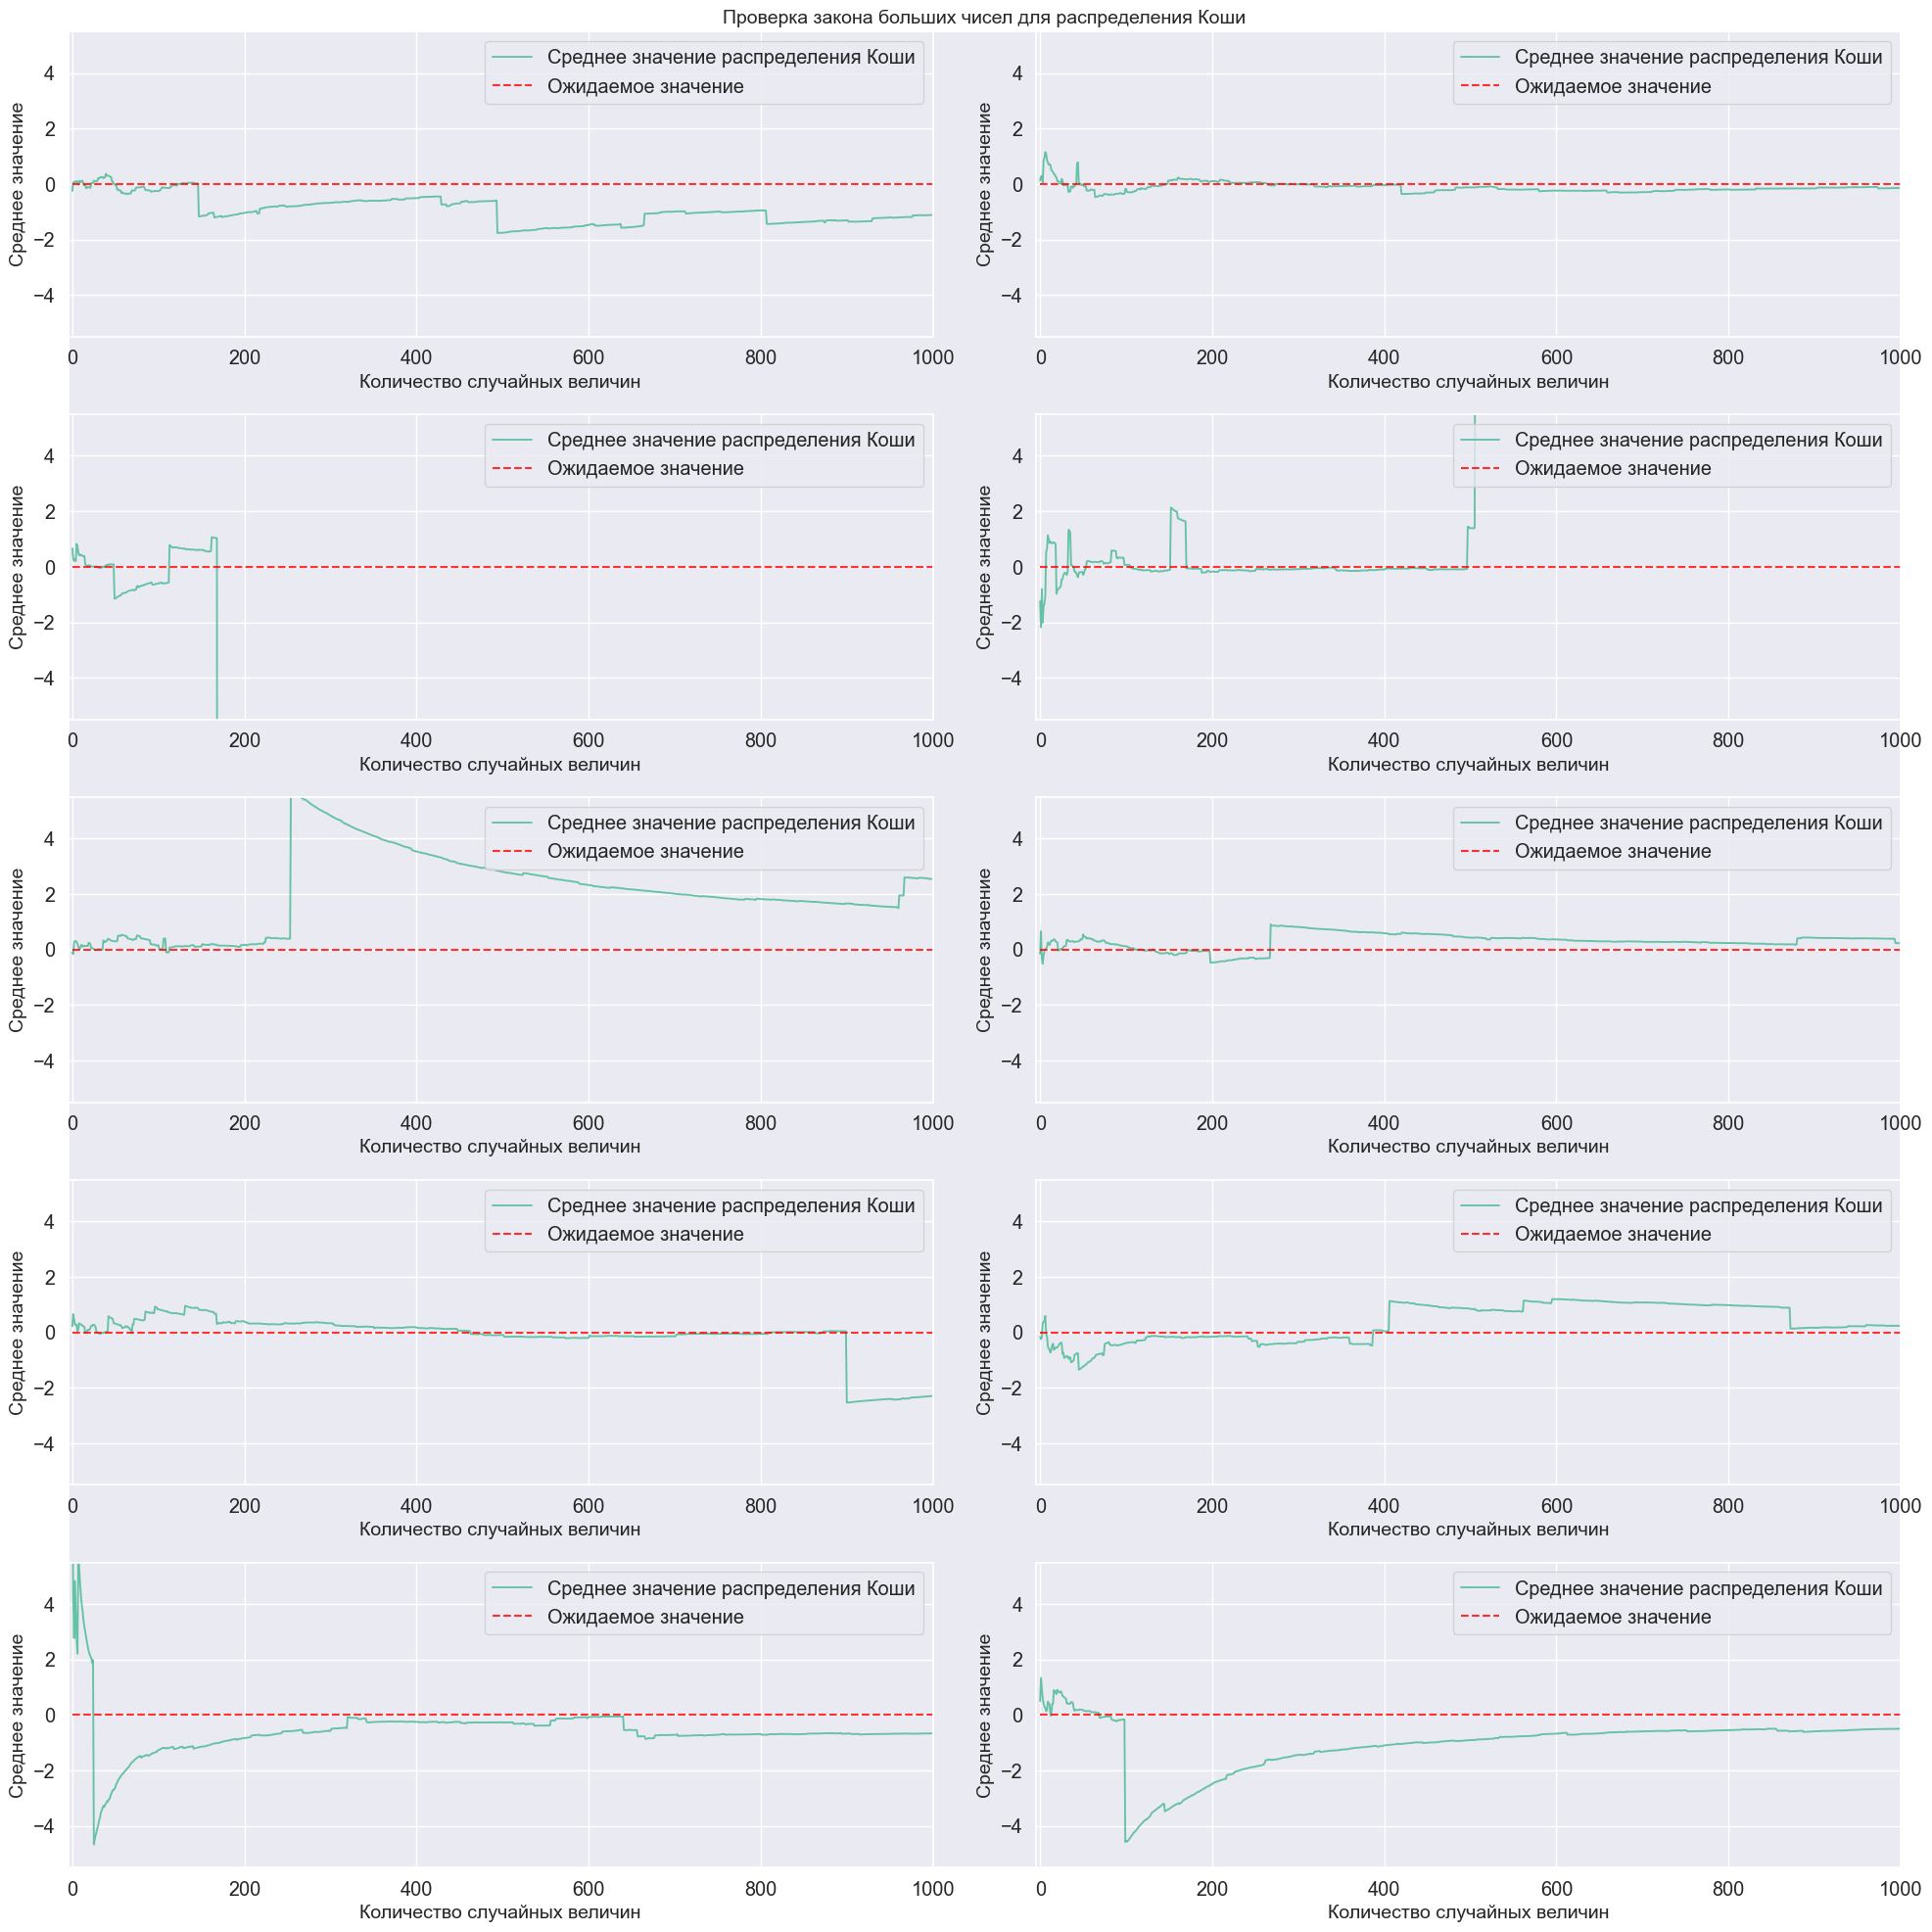

In [268]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(20, 20))
    plt.title("Проверка закона больших чисел для распределения Коши", fontsize=14)
    plt.yticks([])
    plt.xticks([])

    for i in range(10):
        plt.subplot(5, 2, i + 1)
    
        visual_verification_LLN(
            size=1000,
            distribution=sps.cauchy(loc=0, scale=0.5),
            expected=0,
            distribution_name="Коши",
            y_lower_bound=-5.5,
            y_upper_bound=5.5,
            alpha=0.8,
            manage_creation_plot=False,
        )
    plt.tight_layout()

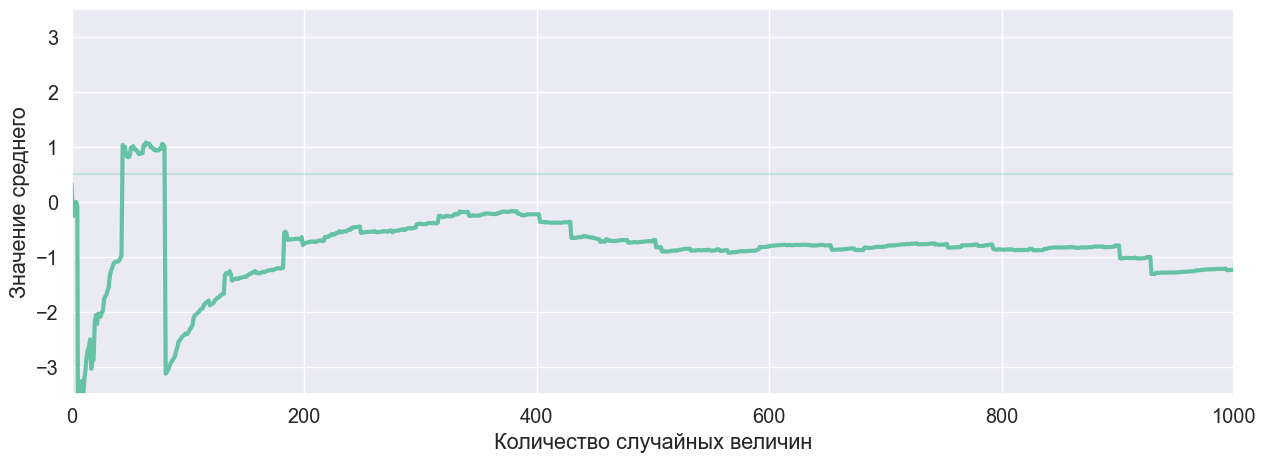

In [269]:
def gen_aver_sample(size=1000):
    samples = sps.cauchy().rvs(size=size)
    return samples.cumsum() / (np.arange(size) + 1)


def LBN_average_plot():
    plt.figure(figsize=(15, 5))
    size = 1000
    plt.plot(gen_aver_sample(size), lw=3)
    plt.hlines(0.5, 0, size, alpha=0.3)
    plt.xlabel("Количество случайных величин")
    plt.ylabel("Значение среднего")
    plt.xlim((0, size))
    plt.ylim((-3.5, 3.5))


with sns.axes_style("darkgrid"):
    LBN_average_plot()

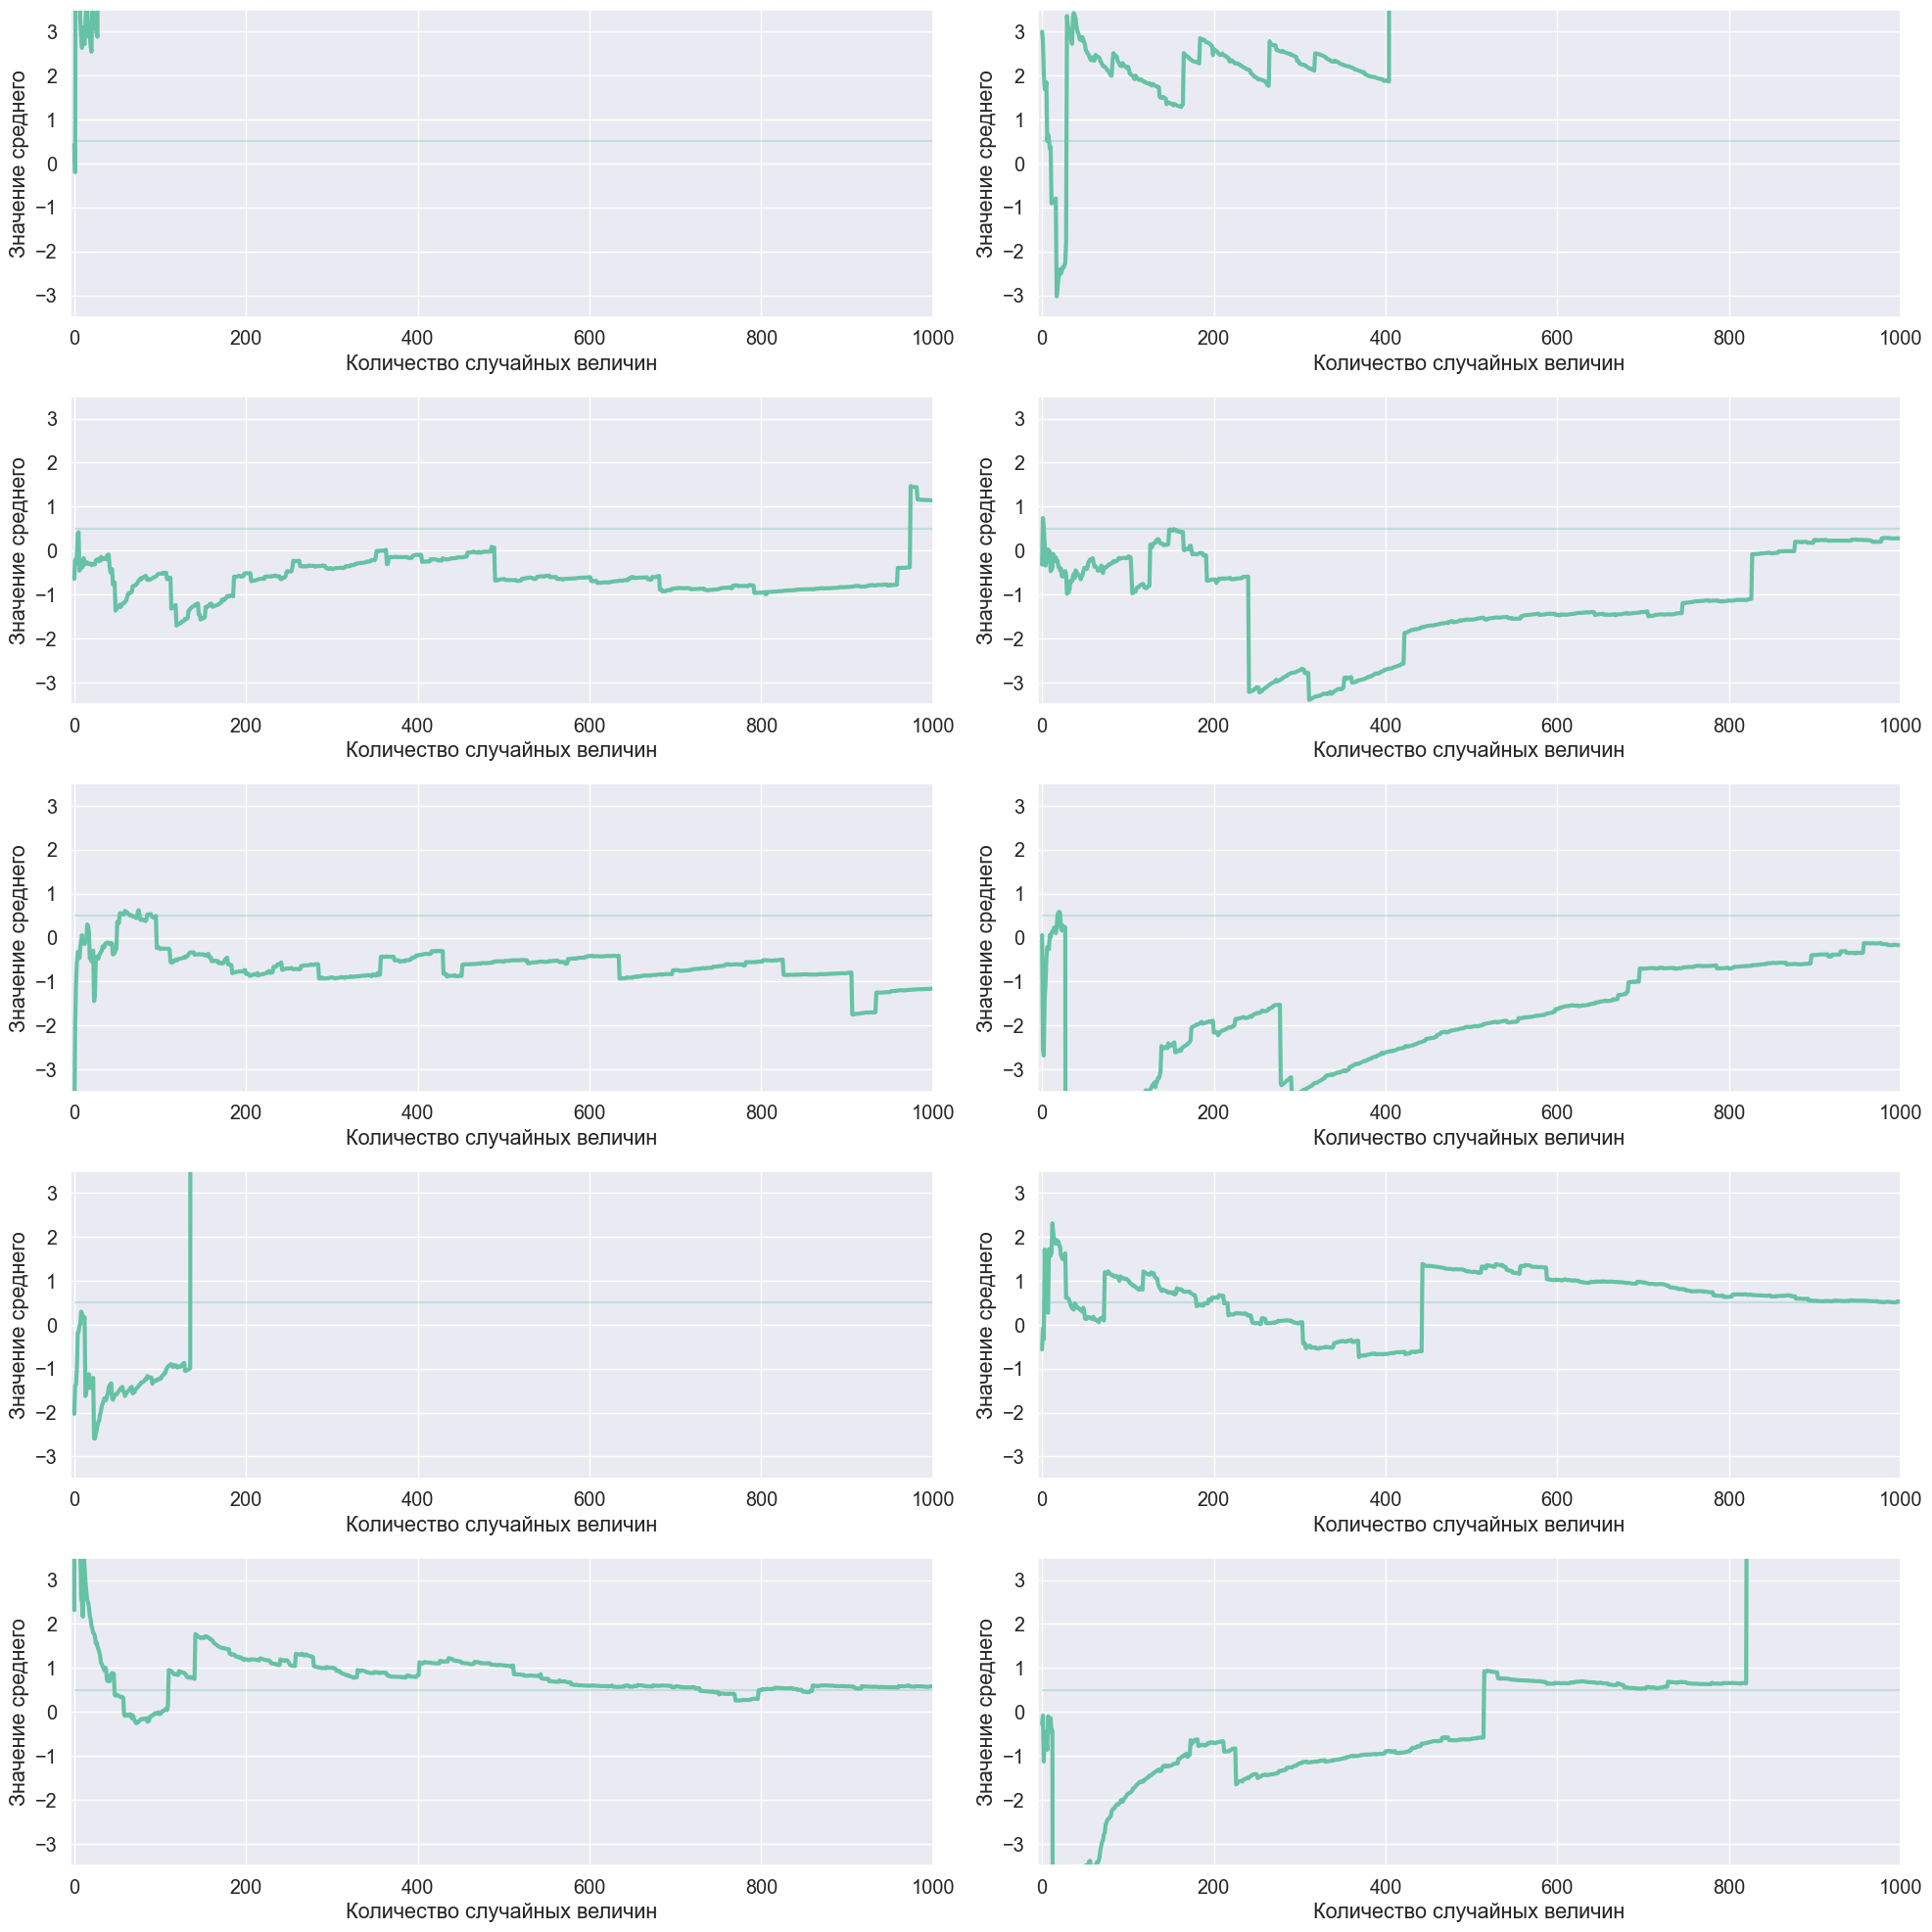

In [270]:
def LBN_few_plots():
    plt.figure(figsize=(20, 20))
    for i in range(10):
        size = 1000
        plt.subplot(5, 2, i + 1)
        plt.plot(gen_aver_sample(size), lw=3)
        plt.hlines(0.5, 0, size, alpha=0.3)
        plt.xlabel("Количество случайных величин")
        plt.ylabel("Значение среднего")
        plt.xlim((-5, size))
        plt.ylim((-3.5, 3.5))
    plt.tight_layout()


with sns.axes_style("darkgrid"):
    LBN_few_plots()

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

**Вывод:**

...

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

**Выводы:**

...